In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
# Loading heart disease dataset
heart_df = pd.read_csv("data/heart.csv")

Context : 
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

<Axes: >

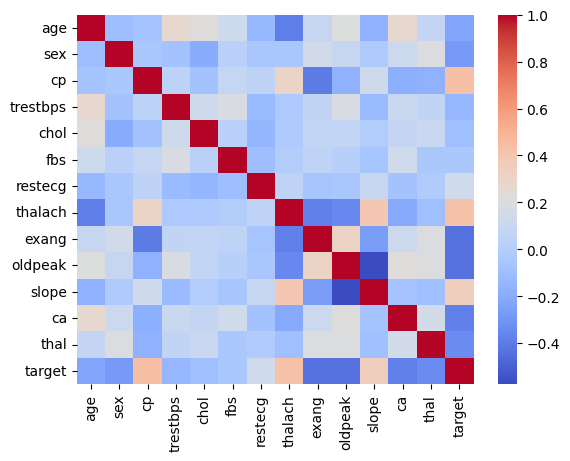

In [4]:
sns.heatmap(heart_df.corr(),cmap = 'coolwarm')

Text(0.5, 1.0, 'Heart Disease Patient')

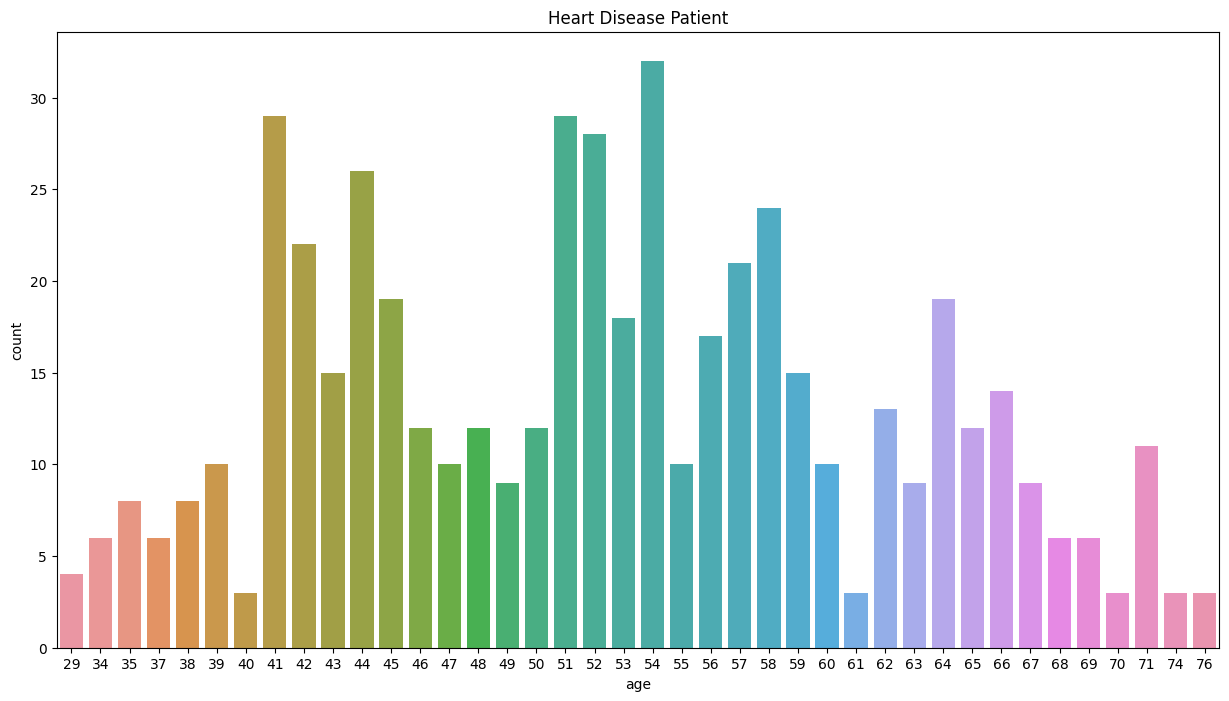

In [17]:
# Observing heart disease patients by their age
pos_diag = heart_df['age'][heart_df.target == 1]
plt.figure(figsize = (15,8))
sns.countplot(x = pos_diag).set_title("Heart Disease Patient")

In [20]:
# Checking for any null values in data
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Separating dependent and independent variable
x_features = heart_df.iloc[:,:13]
y_features = heart_df.iloc[:,13]

In [8]:
# Splitting data into training and testing dataset
train_x,test_x,train_y,test_y = train_test_split(x_features,y_features,train_size=0.8,random_state=42)

In [9]:
# Creating our decision tree model
cls_model = DecisionTreeClassifier()
cls_model.fit(train_x,train_y)

DecisionTreeClassifier()

In [10]:
# Predicting on test data
y_pred = cls_model.predict(test_x)

In [26]:
# Evaluating performance
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(test_y,y_pred)
acc = metrics.accuracy_score(test_y,y_pred)
precision = metrics.precision_score(test_y,y_pred)
recall = metrics.recall_score(test_y,y_pred)
f1score = metrics.f1_score(test_y,y_pred)
print("Confusion matrix : \n{}".format(cm))
print("Accuracy Score  : {}".format(acc))
print("Precision Score : {}".format(precision))
print("Accuracy Score  : {}".format(recall))
print("F1 Score Score  : {}".format(f1score))

Confusion matrix : 
[[102   0]
 [  3 100]]
Accuracy Score  : 0.9853658536585366
Precision Score : 1.0
Accuracy Score  : 0.970873786407767
F1 Score Score  : 0.9852216748768473


Here we can conclude that:
1. persons' at the age of 52 are most vulnerable from all age groups
2. Factors such as thalac(maximum heart rate achieved), cp(chest pain), slope(he slope of the peak exercise ST segment) are main identifiers of a heart disease. 